          PL Intensity (kcps)
Time (s)                     
154.82                    2.8
154.83                    3.2
154.84                    3.7
154.85                    3.1
154.86                    2.1


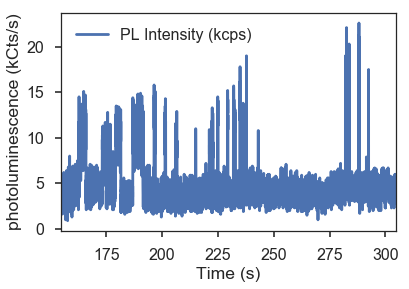

In [57]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set(style='ticks')
sns.set_context('poster')

datadate = '2018-05-31'
datafolder = r'O:\User\Viva\data\2018-05-31_blinking-statistics'
filename = r'04-21-2018.11,00am.FIBedhBN\01.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

filename = r'04-21-2018.11,00am.FIBedhBN-01.txt'
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

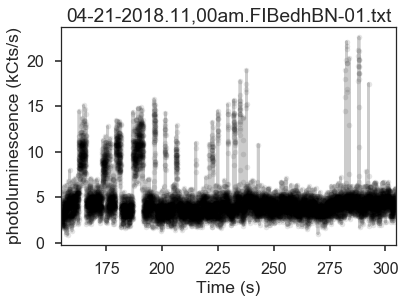

In [59]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+',blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+',blinking.png', bbox_inches='tight', dpi=200)

plt.show()

In [60]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
timesetting

0.010000000000019327

In [61]:
binsequence = np.arange(data.min(), data.max(), fps/350)
len(binsequence)

76

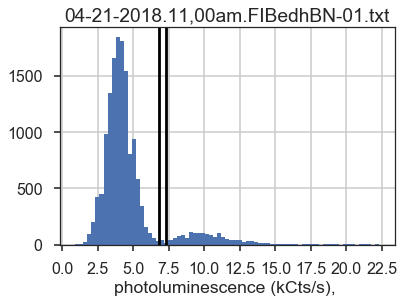

In [65]:
data.hist(bins= binsequence)
plt.xlabel('photoluminescence (kCts/s), ')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

plt.title(filename)

# Need to pick an appropriate threshold between on and off. 
uthreshold = 7.3
lthreshold = uthreshold-.5

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [66]:
data.head()

,PL Intensity (kcps)
Time (s),
154.82,2.8
154.83,3.2
154.84,3.7
154.85,3.1
154.86,2.1


In [67]:
data.count()

PL Intensity (kcps)    14999
dtype: int64

In [68]:
data.describe()

,PL Intensity (kcps)
count,14999.000000
mean,4.681379
std,2.247674
min,0.900000
25%,3.500000
50%,4.100000
75%,4.900000
max,22.600000


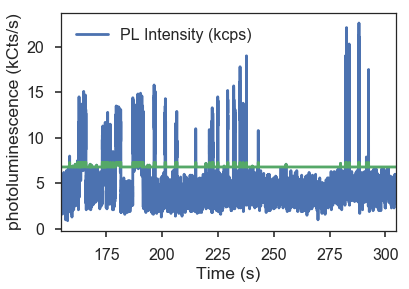

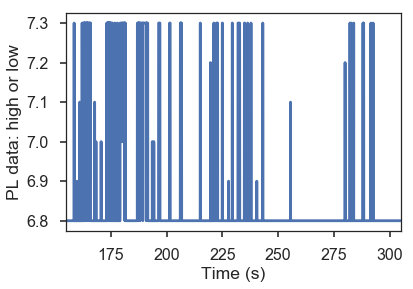

In [69]:
# With an uthreshold and an lthreshold
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.


threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
threshdata.plot()

plt.figure()
threshdata.plot()
plt.ylabel('PL data: high or low')
plt.show()


In [70]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

print(uptimes2)
print(downtimes2)

Float64Index([158.59, 159.95, 161.09, 162.16, 162.61, 162.62, 162.63, 162.65,
              162.66, 162.67,
              ...
              288.23, 288.24, 288.25, 288.26, 288.27, 288.28, 288.29, 291.52,
               292.5, 292.51],
             dtype='float64', name=u'Time (s)', length=1580)
Float64Index([154.82, 154.83, 154.84, 154.85, 154.86, 154.87, 154.88, 154.89,
               154.9, 154.91,
              ...
              304.71, 304.72, 304.73, 304.74, 304.75, 304.76, 304.77, 304.78,
              304.79,  304.8],
             dtype='float64', name=u'Time (s)', length=13465)


In [71]:
# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

print(uptimes)
print(downtimes)

Float64Index([158.59, 162.16, 162.61, 162.62, 162.63, 162.65, 162.66, 162.67,
              162.68, 162.69,
              ...
              288.23, 288.24, 288.25, 288.26, 288.27, 288.28, 288.29, 291.52,
               292.5, 292.51],
             dtype='float64', name=u'Time (s)', length=1534)
Float64Index([154.82, 154.83, 154.84, 154.85, 154.86, 154.87, 154.88, 154.89,
               154.9, 154.91,
              ...
              304.71, 304.72, 304.73, 304.74, 304.75, 304.76, 304.77, 304.78,
              304.79,  304.8],
             dtype='float64', name=u'Time (s)', length=13419)


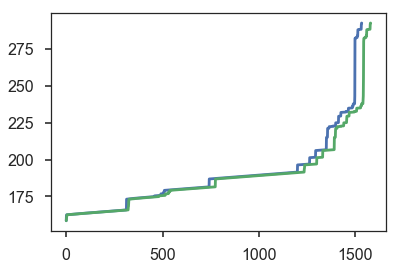

In [72]:
plt.plot(uptimes)
plt.plot(uptimes2)
plt.show()

In [73]:
uptimes[:-1]

Float64Index([158.59, 162.16, 162.61, 162.62, 162.63, 162.65, 162.66, 162.67,
              162.68, 162.69,
              ...
              288.22, 288.23, 288.24, 288.25, 288.26, 288.27, 288.28, 288.29,
              291.52,  292.5],
             dtype='float64', name=u'Time (s)', length=1533)

In [74]:
uptimes[1:]

Float64Index([162.16, 162.61, 162.62, 162.63, 162.65, 162.66, 162.67, 162.68,
              162.69,  162.7,
              ...
              288.23, 288.24, 288.25, 288.26, 288.27, 288.28, 288.29, 291.52,
               292.5, 292.51],
             dtype='float64', name=u'Time (s)', length=1533)

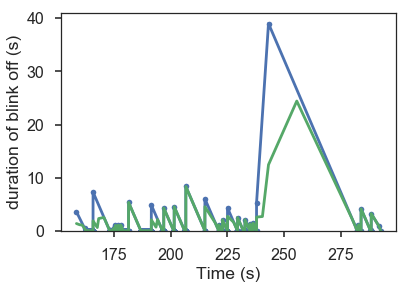

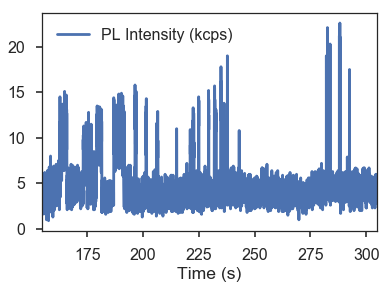

In [75]:
# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()

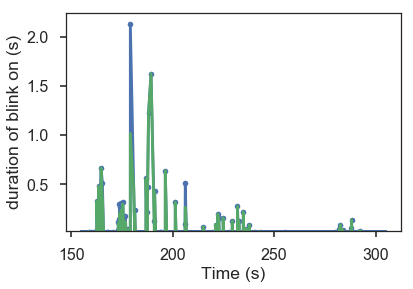

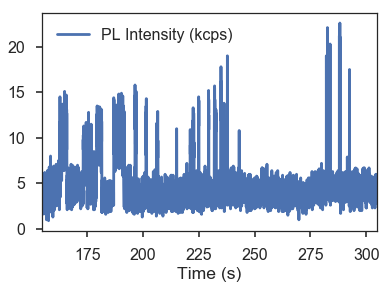

In [76]:
# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()

In [77]:
downtimesep2

Float64Index([            0.01, 0.00999999999999, 0.00999999999999,
                          0.01, 0.00999999999999, 0.00999999999999,
              0.00999999999999,             0.01, 0.00999999999999,
              0.00999999999999,
              ...
              0.00999999999999,             0.01, 0.00999999999999,
              0.00999999999999, 0.00999999999999, 0.00999999999999,
              0.00999999999999, 0.00999999999999,             0.01,
              0.00999999999999],
             dtype='float64', name=u'Time (s)', length=13464)

In [78]:
# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

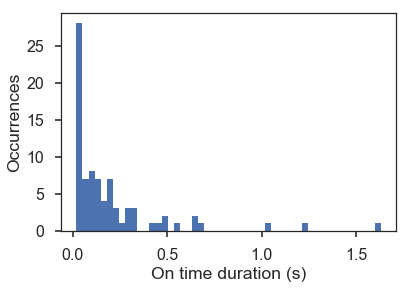

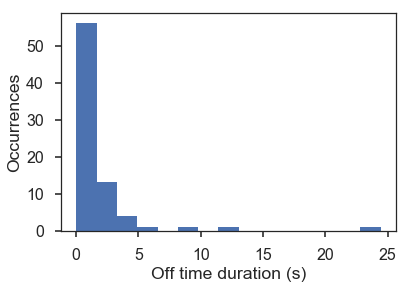

In [79]:
# Choose a nice number of bins to see how the data look.

numonbins = 50
numoffbins = 15

plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
plt.show()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
plt.show()

In [80]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

In [81]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace

def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [82]:
## I decided to start my bins at 0. 
# This might be different from the built in hist function.

oninc = max(ontimes)/numonbins
onbins= frange(0,max(ontimes)+oninc*3,oninc)
#print(onbins[0:5])


offinc = max(offtimes)/numoffbins
offbins=np.linspace(0,max(offtimes),numoffbins+1)
print("linspace option (not used):")
print(offbins)
offbins= frange(0,max(offtimes),offinc)
print("frange approach:")
print(offbins)
#print(offbins[0:5])
offbins= frange(0,max(offtimes)+offinc*3,offinc)
print("frange approach and pad 3 bins to right (used):")
print(offbins)

centeredonbins = frange(oninc/2,max(ontimes)+oninc*3+oninc/2,oninc)
centeredoffbins= frange(offinc/2,max(offtimes)+offinc*3+offinc/2,offinc)
#centeredoffbins=np.linspace(offinc/2,max(offtimes)+offinc/2,numoffbins)


print('\n')
print(onbins[-5:])
print(centeredonbins[-5:])

print("Make sure ")
print(len(centeredonbins))
print(len(onbins))
print(len(centeredoffbins))
print(len(offbins))

linspace option (not used):
[  0.           1.62866667   3.25733333   4.886        6.51466667
   8.14333333   9.772       11.40066667  13.02933333  14.658       16.28666667
  17.91533333  19.544       21.17266667  22.80133333  24.43      ]
frange approach:
[0.0, 1.6286666666666652, 3.2573333333333303, 4.8859999999999957, 6.5146666666666606, 8.1433333333333255, 9.7719999999999914, 11.400666666666655, 13.029333333333321, 14.657999999999987, 16.286666666666651, 17.915333333333315, 19.543999999999983, 21.172666666666647, 22.801333333333311]
frange approach and pad 3 bins to right (used):
[0.0, 1.6286666666666652, 3.2573333333333303, 4.8859999999999957, 6.5146666666666606, 8.1433333333333255, 9.7719999999999914, 11.400666666666655, 13.029333333333321, 14.657999999999987, 16.286666666666651, 17.915333333333315, 19.543999999999983, 21.172666666666647, 22.801333333333311, 24.429999999999978, 26.058666666666642, 27.687333333333306]


[1.5647999999999955, 1.5973999999999955, 1.6299999999999955, 

In [83]:
onhist = histc(ontimes, np.asarray(onbins))
offhist = histc(offtimes, np.asarray(offbins))

In [84]:
onhist

[array([ 16.,  13.,  10.,   9.,   6.,   1.,   7.,   2.,   2.,   3.,   2.,
          0.,   0.,   1.,   3.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.]),
 array([ 1,  1,  2, 11,  5,  5,  1,  8, 15, 10,  7,  4,  3, 21, 11,  6,  2,
         4,  1,  3,  2,  1,  2,  2,  1,  3,  1,  1,  7,  3,  7,  3,  1,  5,
         2,  8,  3,  1,  1, 10,  1,  2,  4,  2, 32, 20, 15,  2,  7, 18,  4,
         4, 15, 38, 51,  4, 14, 20, 10,  4,  9,  7,  1,  3,  3,  7,  5,  5,
         4,  9,  4,  7,  2,  3,  1,  2,  3,  2,  2,  5,  1,  1], dtype=int64)]

In [85]:
offhist

[array([ 56.,  13.,   4.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  2,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  2,  1,  2,  3,
         3,  1,  6,  3,  1,  1,  1,  2,  2,  1,  2,  1,  2,  1,  1,  2,  2,
         8, 16,  2,  1,  1,  3,  1,  2,  1], dtype=int64)]

red data are histogram data and black data are shifted to be centered on the bin


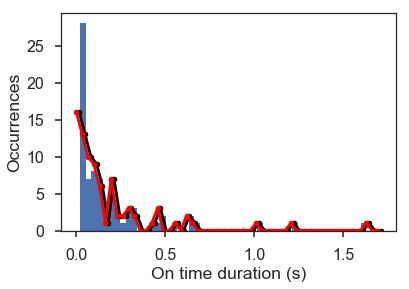

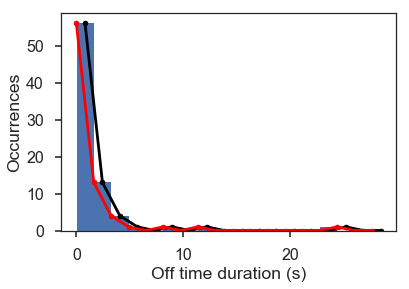

In [86]:
print("red data are histogram data and black data are shifted to be centered on the bin")

#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-k')
ax1.plot(onbins,onhist[0],'.-r')
plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')

# Apparently my digitize and the hist function don't quite give the same output. 
# I think the hist command doesn't start at zero.
# Either way is probably fine.

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-k')
ax2.plot(offbins,offhist[0],'.-r')
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax2.set_yscale('symlog')
plt.show()

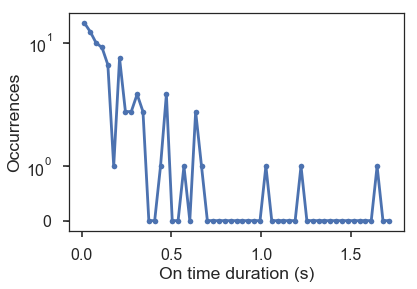

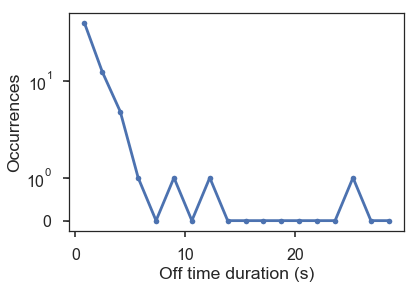

In [87]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax2.set_yscale('symlog')
plt.show()

In [88]:
from scipy.optimize import curve_fit
import scipy
scipy.__version__
# need at least version 14.0 of scipy.

'0.17.1'

In [89]:
def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# on time fit
onparams, onpcov = curve_fit(expfit, centeredonbins, onhist[0],p0 = (30, 0.8))
onfitx = np.linspace(min(centeredonbins),max(ontimes)+oninc*3,numonbins*5)
onfit = expfit(onfitx,onparams[0],onparams[1])

In [90]:
# Trying to find good guess
#onparams[1]=-.8
#onfit = 30 * np.exp(centeredonbins/(onparams[1]))

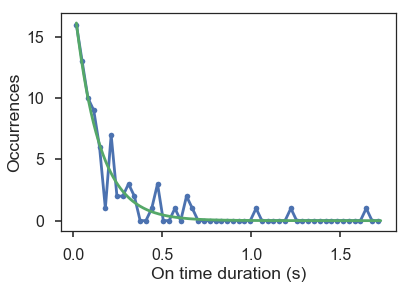

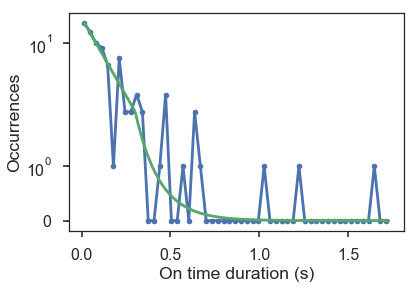

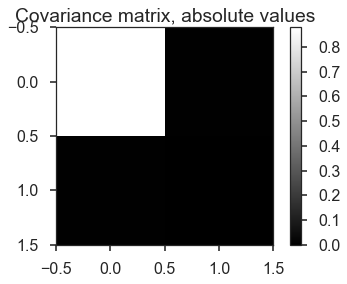

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 18.1753631608 ± 0.93830898749
time constant tau = 0.136810129055 ± 0.00993960032604


In [91]:
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

plt.imshow(abs(onpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(onparams[0]) + ' ± ' + str(np.sqrt(onpcov[0,0]))
print 'time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1]))



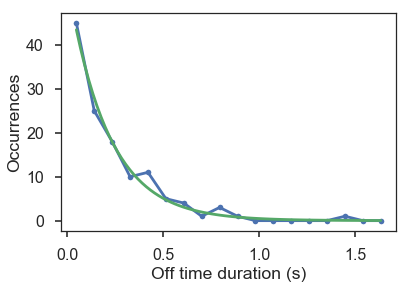

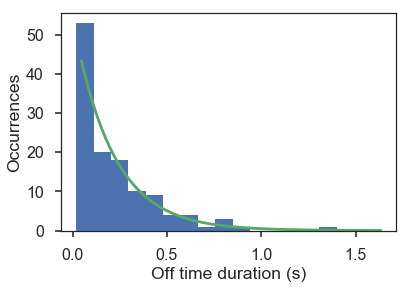

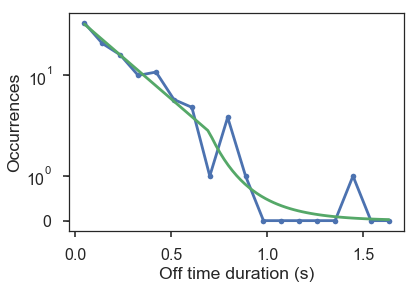

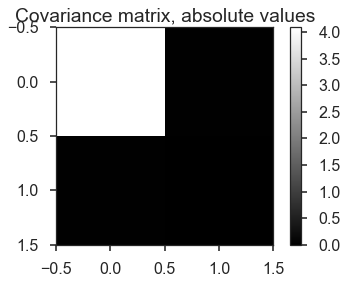

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 54.2255608199 ± 2.02404414802
time constant tau = 0.210864518533 ± 0.0109404559536 sec


In [46]:
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

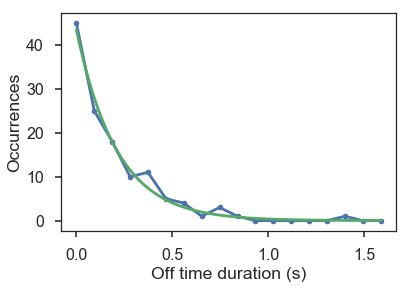

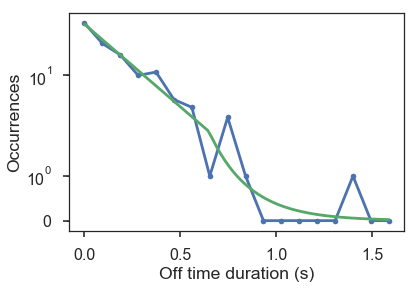

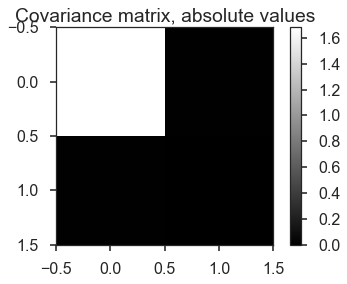

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 43.4600347573 ± 1.29721897383
time constant tau = 0.210864169888 ± 0.0109402682494 sec


In [47]:
## I'm not sure whether the bins should be aligned left or center. 
# I already did centered alignment; 
# here's left alignment.
## It turns out it doesn't affect the characteristic time tau.

# off time fit
offparams, offpcov = curve_fit(expfit, offbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(offbins),max(offtimes)+2.0*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# plot
fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

off time constant tau = 0.210864518533 ± 0.0109404559536 sec
on time constant tau = 0.185525742468 ± 0.00800635639497 sec


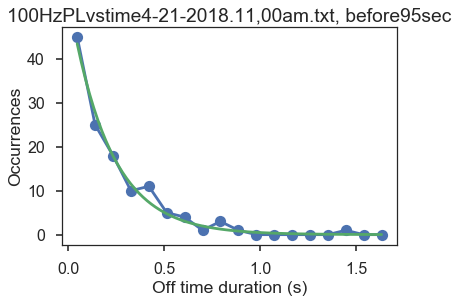

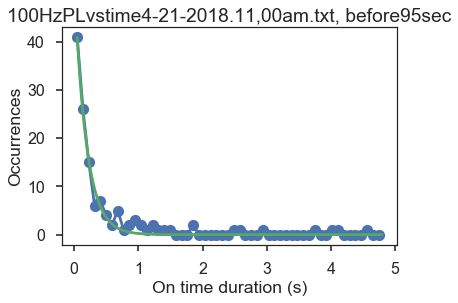

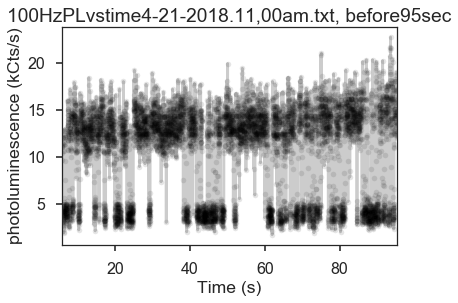

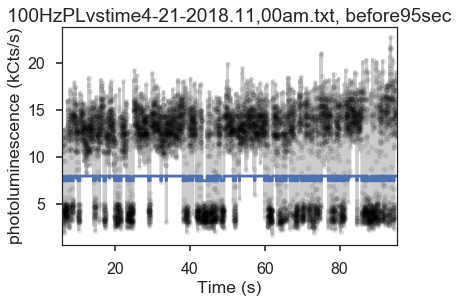

In [49]:
# Save figures

font = {'size'   : 22}

plt.rc('font', **font)

# OFF BLINKS
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display off blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.title(filename)
plt.savefig(today + ',' + filename+'offblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'offblinks.png', bbox_inches='tight', dpi=200)


print 'off time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'


# On blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'o-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.title(filename)

plt.savefig(today + ',' + filename+'onblinks.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'onblinks.png', bbox_inches='tight', dpi=200)


print 'on time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)


fig2,axPL = plt.subplots()
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False)
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)
plt.title(filename)

plt.savefig(today + ',' + filename+'blinkingandthreshold.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinkingandthreshold.png', bbox_inches='tight', dpi=200)


plt.show()